In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from matplotlib import font_manager, rc

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

### read_csv 하는데 필요한 파일 목록

- ./fin_data/서울시_고령자현황(구별)통계(2017).csv
- ./fin_data/서울시_고령자현황(구별)통계(2018).csv
- ./fin_data/서울시_고령자현황(구별)통계(2019).csv
- ./fin_data/서울시_고령자현황(구별)통계(2020).csv
- ./data/서울시 지도.json
- ./data/17.csv
- ./data/18.csv
- ./data/19.csv
- ./data/20.csv

In [3]:
# 필요한 데이터 불러와서 변수로 저장
Elder2017 = pd.read_csv("./fin_data/서울시_고령자현황(구별)통계(2017).csv")
Elder2018 = pd.read_csv("./fin_data/서울시_고령자현황(구별)통계(2018).csv")
Elder2019 = pd.read_csv("./fin_data/서울시_고령자현황(구별)통계(2019).csv")
Elder2020 = pd.read_csv("./fin_data/서울시_고령자현황(구별)통계(2020).csv")

Price2017 = pd.read_csv("./data/17.csv")
Price2018 = pd.read_csv("./data/18.csv")
Price2019 = pd.read_csv("./data/19.csv")
Price2020 = pd.read_csv("./data/20.csv")

In [4]:
# 가져온 데이터 정리하기
Price2017.rename(columns={'구' : '자치구'}, inplace=True)
Price2018.rename(columns={'구' : '자치구'}, inplace=True)
Price2019.rename(columns={'구' : '자치구'}, inplace=True)
Price2020.rename(columns={'구' : '자치구'}, inplace=True)

Price2017.sort_values(by='자치구', ascending = True, inplace=True)
Price2018.sort_values(by='자치구', ascending = True, inplace=True)
Price2019.sort_values(by='자치구', ascending = True, inplace=True)
Price2020.sort_values(by='자치구', ascending = True, inplace=True)

Price2017.reset_index(inplace=True, drop=True)
Price2018.reset_index(inplace=True, drop=True)
Price2019.reset_index(inplace=True, drop=True)
Price2020.reset_index(inplace=True, drop=True)

Price2017.to_csv("./data/2017.csv", index = False)
Price2018.to_csv("./data/2018.csv", index = False)
Price2019.to_csv("./data/2019.csv", index = False)
Price2020.to_csv("./data/2020.csv", index = False)

In [5]:
Elder2017.head()

,기간,자치구,노인 비율%(계),노인 비율%(남),노인 비율%(여)
0,2017,강남구,11.60,5.23,6.37
1,2017,강동구,12.75,5.80,6.95
2,2017,강북구,17.23,7.41,9.82
3,2017,강서구,12.50,5.51,6.99
4,2017,관악구,13.45,6.05,7.40


In [45]:
#json 파일 변수로 저장
import json
geo_path = './data/서울시 지도.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))

# 2017년 서울시 인구수 시각화
# 서울시 중심부의 위도, 경도 입니다.
center = [37.541, 126.986]

# 맵이 center 에 위치하고, zoom 레벨은 11로 시작하는 맵 map을 만듭니다.
map1 = folium.Map(location=center,tiles='cartodbpositron',  zoom_start=11)
    
# 같은걸 여러번 해야 하므로 함수 생성
def draw_map(map, data, column):
# Choropleth 레이어를 만들고, 맵 map에 추가합니다.
    folium.Choropleth(
        geo_data=geo_data,
        data=data,
        columns=('자치구', column),
        key_on='feature.properties.name',
        fill_color='Paired',
        legend_name=column,
        ).add_to(map)

draw_map(map1,Elder2017,'노인 비율%(계)')
map1.save('filename.html')
# 맵 map을 출력합니다.
map1

In [46]:
map2 = folium.Map(location=center,tiles='cartodbpositron',  zoom_start=11)
draw_map(map2,Elder2018,'노인 비율%(계)')
map2

In [47]:
map3 = folium.Map(location=center,tiles='cartodbpositron',  zoom_start=11)
draw_map(map3,Elder2019,'노인 비율%(계)')
map3

In [48]:
map4 = folium.Map(location=center,tiles='cartodbpositron',  zoom_start=11)
draw_map(map4,Elder2020,'노인 비율%(계)')
map4

In [33]:
map5 = folium.Map(location=center,tiles='cartodbpositron',  zoom_start=11)
draw_map(map5,Price2017,'거래금액(만원)/전용면적(㎡)')
map5

In [34]:
map6 = folium.Map(location=center,tiles='cartodbpositron',  zoom_start=11)
draw_map(map6,Price2018,'거래금액(만원)/전용면적(㎡)')
map6

In [35]:
map7 = folium.Map(location=center,tiles='cartodbpositron',  zoom_start=11)
draw_map(map7,Price2019,'거래금액(만원)/전용면적(㎡)')
map7

In [36]:
map8 = folium.Map(location=center,tiles='cartodbpositron',  zoom_start=11)
draw_map(map8,Price2020,'거래금액(만원)/전용면적(㎡)')
map8

In [14]:
Elder2017.head()

,기간,자치구,노인 비율%(계),노인 비율%(남),노인 비율%(여)
0,2017,강남구,11.60,5.23,6.37
1,2017,강동구,12.75,5.80,6.95
2,2017,강북구,17.23,7.41,9.82
3,2017,강서구,12.50,5.51,6.99
4,2017,관악구,13.45,6.05,7.40


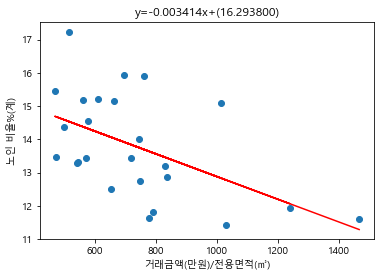

In [55]:
# 산포도를 만든다
plt.scatter(Price2017['거래금액(만원)/전용면적(㎡)'],Elder2017['노인 비율%(계)'])
fit_weight = np.polyfit(Price2017['거래금액(만원)/전용면적(㎡)'],Elder2017['노인 비율%(계)'], 1) 
trend_f = np.poly1d(fit_weight)
              
plt.plot(Price2017['거래금액(만원)/전용면적(㎡)'], trend_f(Price2017['거래금액(만원)/전용면적(㎡)']),"r-")
plt.title("y={:.6f}x+({:.6f})".format(fit_weight[0], fit_weight[1]))
plt.xlabel('거래금액(만원)/전용면적(㎡)')
plt.ylabel('노인 비율%(계)')
# 추세선 파일 저장
plt.savefig('./fin_data/2017추세선.png')
plt.show()

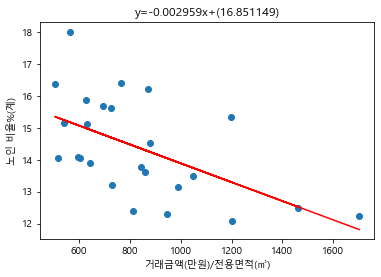

In [56]:
plt.scatter(Price2018['거래금액(만원)/전용면적(㎡)'],Elder2018['노인 비율%(계)'])
fit_weight = np.polyfit(Price2018['거래금액(만원)/전용면적(㎡)'],Elder2018['노인 비율%(계)'], 1) 
trend_f = np.poly1d(fit_weight)
              
plt.plot(Price2018['거래금액(만원)/전용면적(㎡)'], trend_f(Price2018['거래금액(만원)/전용면적(㎡)']),"r-")
plt.title("y={:.6f}x+({:.6f})".format(fit_weight[0], fit_weight[1]))
plt.xlabel('거래금액(만원)/전용면적(㎡)')
plt.ylabel('노인 비율%(계)')
plt.savefig('./fin_data/2018추세선.png')
plt.show()

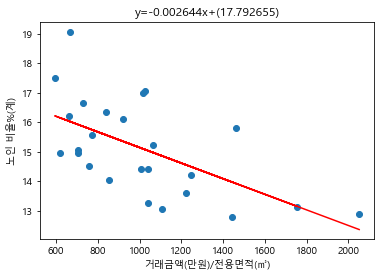

In [57]:
plt.scatter(Price2019['거래금액(만원)/전용면적(㎡)'],Elder2019['노인 비율%(계)'])
fit_weight = np.polyfit(Price2019['거래금액(만원)/전용면적(㎡)'],Elder2019['노인 비율%(계)'], 1) 
trend_f = np.poly1d(fit_weight)
              
plt.plot(Price2019['거래금액(만원)/전용면적(㎡)'], trend_f(Price2019['거래금액(만원)/전용면적(㎡)']),"r-")
plt.title("y={:.6f}x+({:.6f})".format(fit_weight[0], fit_weight[1]))
plt.xlabel('거래금액(만원)/전용면적(㎡)')
plt.ylabel('노인 비율%(계)')
# 추세선 파일 저장
plt.savefig('./fin_data/2019추세선.png')
plt.show()

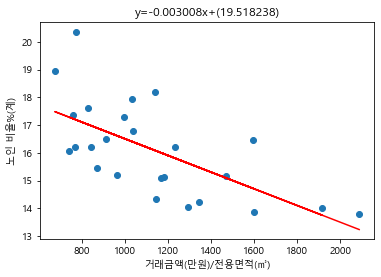

In [58]:
plt.scatter(Price2020['거래금액(만원)/전용면적(㎡)'],Elder2020['노인 비율%(계)'])
fit_weight = np.polyfit(Price2020['거래금액(만원)/전용면적(㎡)'],Elder2020['노인 비율%(계)'], 1) 
trend_f = np.poly1d(fit_weight)
              
plt.plot(Price2020['거래금액(만원)/전용면적(㎡)'], trend_f(Price2020['거래금액(만원)/전용면적(㎡)']),"r-")
plt.title("y={:.6f}x+({:.6f})".format(fit_weight[0], fit_weight[1]))
plt.xlabel('거래금액(만원)/전용면적(㎡)')
plt.ylabel('노인 비율%(계)')
# 추세선 파일 저장
plt.savefig('./fin_data/2020추세선.png')
plt.show()

In [19]:
# 상관계수를 구해준다
cor_number=[]
cor_number.append(round(Elder2017['노인 비율%(계)'].corr(Price2017['거래금액(만원)/전용면적(㎡)']),3))
cor_number.append(round(Elder2018['노인 비율%(계)'].corr(Price2018['거래금액(만원)/전용면적(㎡)']),3))
cor_number.append(round(Elder2019['노인 비율%(계)'].corr(Price2019['거래금액(만원)/전용면적(㎡)']),3))
cor_number.append(round(Elder2020['노인 비율%(계)'].corr(Price2020['거래금액(만원)/전용면적(㎡)']),3))
cor_number

[-0.525, -0.565, -0.592, -0.653]

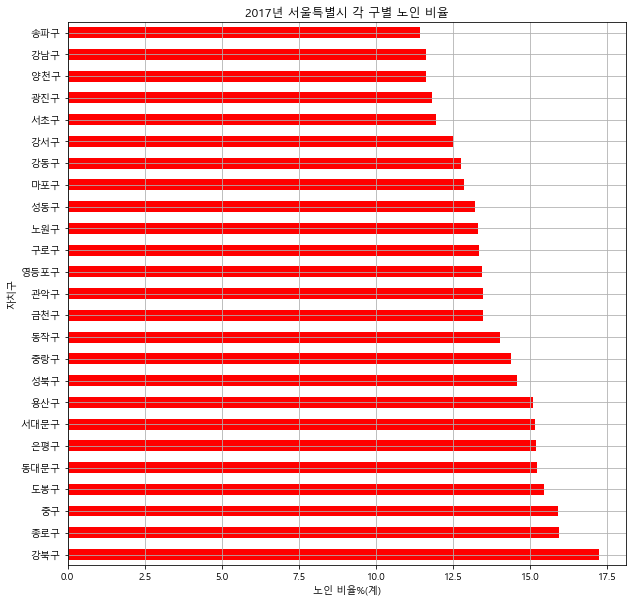

In [24]:
Elder2017_1 = Elder2017.sort_values(by='노인 비율%(계)', ascending = False)
Elder2017_1.set_index('자치구', inplace=True)

plt.figure(figsize=(10,10)) # 10 -> 720 픽셀
Elder2017_1['노인 비율%(계)'].plot(kind='barh', grid=True, color='red')
plt.title('2017년 서울특별시 각 구별 노인 비율')
plt.xlabel('노인 비율%(계)')
plt.savefig('./fin_data/2017막대그래프.png')
plt.show()

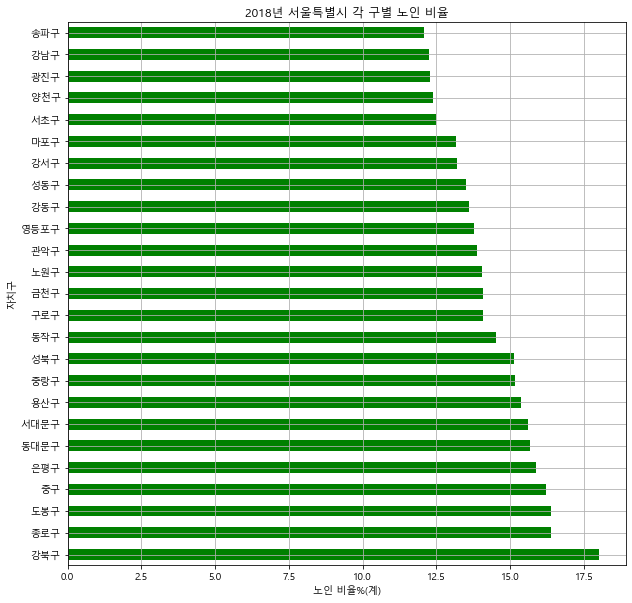

In [25]:
Elder2018_1 = Elder2018.sort_values(by='노인 비율%(계)', ascending = False)
Elder2018_1.set_index('자치구', inplace=True)

plt.figure(figsize=(10,10)) # 10 -> 720 픽셀
Elder2018_1['노인 비율%(계)'].plot(kind='barh', grid=True, color='green')
plt.title('2018년 서울특별시 각 구별 노인 비율')
plt.xlabel('노인 비율%(계)')
plt.savefig('./fin_data/2018막대그래프.png')
plt.show()

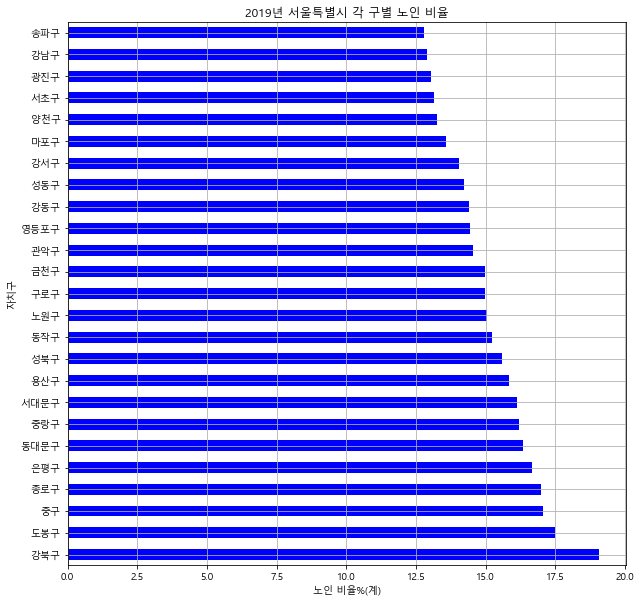

In [26]:
Elder2019_1 = Elder2019.sort_values(by='노인 비율%(계)', ascending = False)
Elder2019_1.set_index('자치구', inplace=True)

plt.figure(figsize=(10,10)) # 10 -> 720 픽셀
Elder2019_1['노인 비율%(계)'].plot(kind='barh', grid=True, color='blue')
plt.title('2019년 서울특별시 각 구별 노인 비율')
plt.xlabel('노인 비율%(계)')
plt.savefig('./fin_data/2019막대그래프.png')
plt.show()

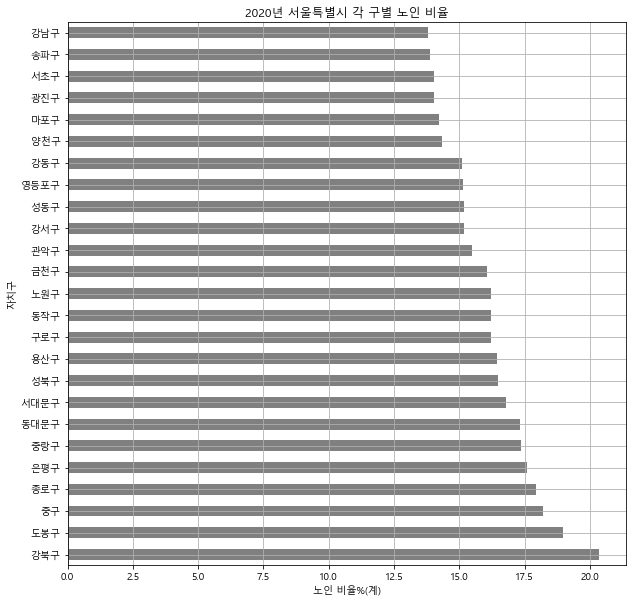

In [27]:
Elder2020_1 = Elder2020.sort_values(by='노인 비율%(계)', ascending = False)
Elder2020_1.set_index('자치구', inplace=True)

plt.figure(figsize=(10,10)) # 10 -> 720 픽셀
Elder2020_1['노인 비율%(계)'].plot(kind='barh', grid=True, color='grey')
plt.title('2020년 서울특별시 각 구별 노인 비율')
plt.xlabel('노인 비율%(계)')
plt.savefig('./fin_data/2020막대그래프.png')
plt.show()

In [28]:
map1.save('./fin_data/map_PlainElder_17.html')
map2.save('./fin_data/map_PlainElder_18.html')
map3.save('./fin_data/map_PlainElder_19.html')
map4.save('./fin_data/map_PlainElder_20.html')
map5.save('./fin_data/map_Price_17.html')
map6.save('./fin_data/map_Price_18.html')
map7.save('./fin_data/map_Price_19.html')
map8.save('./fin_data/map_Price_20.html')